-----------
Initializing structure...
time for choose_chunkdivision = 8.89301e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 30 with resolution 70
time for set_epsilon = 0.000622034 s
-----------


FloatProgress(value=0.0, description='0% done ', max=8000.0)

Meep progress: 457.9428571428571/8000.0 = 5.7% done in 4.0s, 65.9s to go
on time step 64183 (time=458.45), 6.23219e-05 s/step
Meep progress: 937.25/8000.0 = 11.7% done in 8.0s, 60.3s to go
on time step 131299 (time=937.85), 5.96022e-05 s/step
Meep progress: 1378.892857142857/8000.0 = 17.2% done in 12.0s, 57.6s to go
on time step 193136 (time=1379.54), 6.46869e-05 s/step
Meep progress: 1821.7142857142856/8000.0 = 22.8% done in 16.0s, 54.3s to go
on time step 255141 (time=1822.44), 6.45112e-05 s/step
Meep progress: 2265.142857142857/8000.0 = 28.3% done in 20.0s, 50.6s to go
on time step 317229 (time=2265.92), 6.44254e-05 s/step
Meep progress: 2727.307142857143/8000.0 = 34.1% done in 24.0s, 46.4s to go
on time step 381942 (time=2728.16), 6.18122e-05 s/step
Meep progress: 3177.942857142857/8000.0 = 39.7% done in 28.0s, 42.5s to go
on time step 445047 (time=3178.91), 6.33865e-05 s/step
Meep progress: 3658.585714285714/8000.0 = 45.7% done in 32.0s, 38.0s to go
on time step 512337 (time=3659.

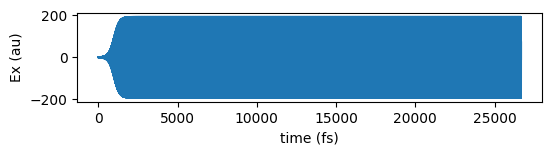

In [54]:
# Reference simulation (source only)

# Experimental values for input
# n=2.46
# n2=1.25*10^-18 m^2/V^2
# wavelength=1.53um
# slab thickness = wavelength
# input amplitude a=1.927*10^8 V/m

import meep as mp
import numpy as np
import matplotlib.pyplot as plt

sz = 30          # size of cell in z direction
amp = 0.5*10**3*1.5417      # amplitude of source
dpml = 2        # PML thickness
k = 4.1e-06        # Kerr susceptibility
n=2.46         # index
time_set=8000         # simulation run time
resolution = 70

#----Continuous Source
frq_cs=1/1.53          # meep frequency
cs_width=100          #the inverse of the exponential rate at which the current turns off and on

# frequency range for monitors
nfreq = 1
fmin = 1/1.53
fmax = 1/1.53

# Geometry
d_s=1.53# slab thickness
pos_s=0# slab position

geometry = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=[] ))]
geometry2 = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=k ))]

dimensions = 1
cell = mp.Vector3(0, 0, sz)
pml_layers = mp.PML(dpml)
default_material = mp.Medium(index=1, chi3=[])

sources = mp.Source(mp.ContinuousSource(frq_cs, width=cs_width), component=mp.Ex,
					center=mp.Vector3(0, 0, -0.5*sz + dpml), amplitude=amp)

sim = mp.Simulation(cell_size=cell,
					geometry=[],
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))

#         Define E field monitor
dx=1/resolution
dt=0.5*dx
tm_val_x=[]
def get_dot(sim):	
	tm_val_x.append(sim.get_array(size=mp.Vector3(), center=mp.Vector3(0,0,-0.5*sz + dpml), component=mp.Ex))
#        #        #        #    

sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Save reference data
freqs_ref = mp.get_flux_freqs(trans_ref)
plt_range_ref=1/np.asarray(freqs_ref)
box_x1_trans_ref = mp.get_fluxes(trans_ref)
flux_ref=np.asarray(box_x1_trans_ref)

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 9.39369e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 30 with resolution 70
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.000550032 s
-----------


FloatProgress(value=0.0, description='0% done ', max=8000.0)

Meep progress: 450.84285714285716/8000.0 = 5.6% done in 4.0s, 67.0s to go
on time step 63219 (time=451.564), 6.32729e-05 s/step
Meep progress: 906.2071428571428/8000.0 = 11.3% done in 8.0s, 62.6s to go
on time step 126973 (time=906.95), 6.27419e-05 s/step
Meep progress: 1382.6/8000.0 = 17.3% done in 12.0s, 57.4s to go
on time step 193690 (time=1383.5), 5.99551e-05 s/step
Meep progress: 1865.1357142857141/8000.0 = 23.3% done in 16.0s, 52.6s to go
on time step 261248 (time=1866.06), 5.92087e-05 s/step
Meep progress: 2321.078571428571/8000.0 = 29.0% done in 20.0s, 48.9s to go
on time step 325091 (time=2322.08), 6.26545e-05 s/step
Meep progress: 2790.942857142857/8000.0 = 34.9% done in 24.0s, 44.8s to go
on time step 390892 (time=2792.09), 6.07897e-05 s/step
Meep progress: 3274.7785714285715/8000.0 = 40.9% done in 28.0s, 40.4s to go
on time step 458642 (time=3276.01), 5.9041e-05 s/step
Meep progress: 3757.4571428571426/8000.0 = 47.0% done in 32.0s, 36.1s to go
on time step 526232 (time=375

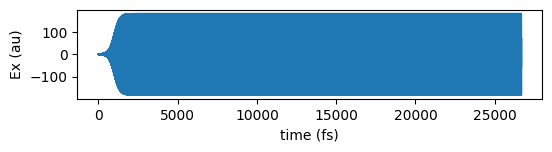

In [55]:
# 1d simulation of a plane wave propagating through a linear slab
sim.reset_meep()

sim = mp.Simulation(cell_size=cell,
					geometry=geometry,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
freqs_lin = mp.get_flux_freqs(trans)
plt_range_lin=1/np.asarray(freqs_lin)
box_x1_trans_lin = mp.get_fluxes(trans)
flux_lin=np.asarray(box_x1_trans_lin)
box_x1_refl_lin = mp.get_fluxes(refl)
flux_refl_lin=np.asarray(box_x1_refl_lin)

tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 9.91821e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 30 with resolution 70
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.000540018 s
-----------


FloatProgress(value=0.0, description='0% done ', max=8000.0)

Meep progress: 421.52142857142854/8000.0 = 5.3% done in 4.0s, 71.9s to go
on time step 59112 (time=422.229), 6.76682e-05 s/step
Meep progress: 855.2714285714286/8000.0 = 10.7% done in 8.0s, 66.8s to go
on time step 119843 (time=856.021), 6.58646e-05 s/step
Meep progress: 1323.2857142857142/8000.0 = 16.5% done in 12.0s, 60.5s to go
on time step 185388 (time=1324.2), 6.10271e-05 s/step
Meep progress: 1797.0/8000.0 = 22.5% done in 16.0s, 55.2s to go
on time step 251711 (time=1797.94), 6.03114e-05 s/step
Meep progress: 2269.7571428571428/8000.0 = 28.4% done in 20.0s, 50.5s to go
on time step 317903 (time=2270.74), 6.04305e-05 s/step
Meep progress: 2715.307142857143/8000.0 = 33.9% done in 24.0s, 46.7s to go
on time step 380290 (time=2716.36), 6.41164e-05 s/step
Meep progress: 3175.1071428571427/8000.0 = 39.7% done in 28.0s, 42.5s to go
on time step 444682 (time=3176.3), 6.21201e-05 s/step
Meep progress: 3651.307142857143/8000.0 = 45.6% done in 32.0s, 38.1s to go
on time step 511362 (time=36

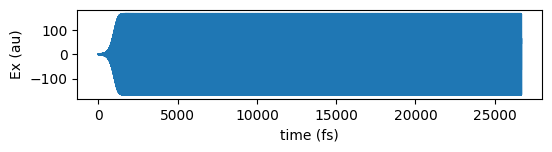

In [56]:
# 1d simulation of a plane wave propagating through a Kerr medium
sim.reset_meep()


#geometry = [mp.Block(center=mp.Vector3(0,0,(sz-dpml)/4),size=mp.Vector3(0,0,(sz-dpml)/2), material=mp.Medium(index=n, chi3=k ))]

sim = mp.Simulation(cell_size=cell,
					geometry=geometry2,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)

#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

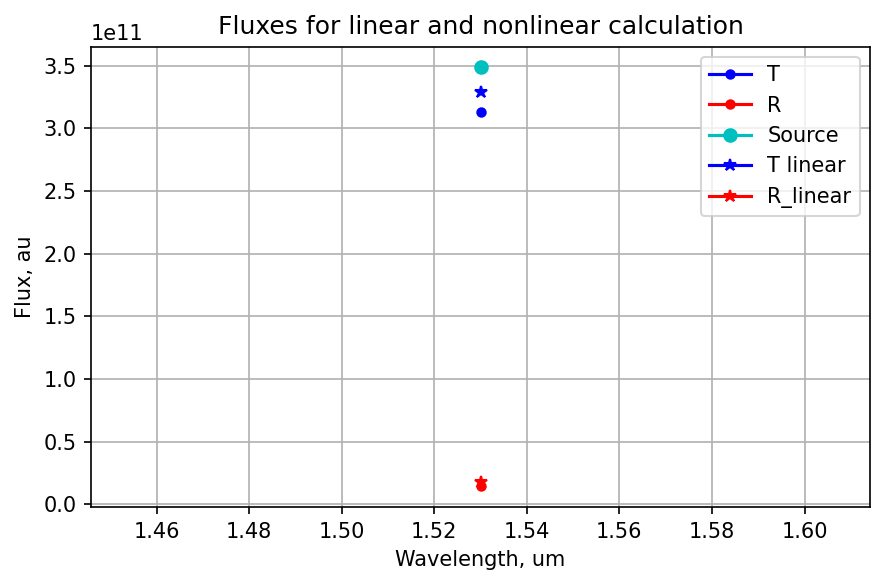

In [57]:
#         plot fluxes
freqs = mp.get_flux_freqs(trans)
plt_range=1/np.asarray(freqs)
box_x1_trans = mp.get_fluxes(trans)
flux=np.asarray(box_x1_trans)
box_x1_refl = mp.get_fluxes(refl)
flux_refl=np.asarray(box_x1_refl)
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux,'bo-',label='T',markersize=4)
plt.plot(plt_range_ref,-flux_refl+flux_ref,'ro-',label='R',markersize=4)
plt.plot(plt_range_ref,flux_ref,'co-',label='Source')
plt.plot(plt_range_ref,flux_lin,'b*-',label='T linear')
plt.plot(plt_range_ref,-flux_refl_lin+flux_ref,'r*-',label='R_linear')
plt.grid(True,which="both",ls="-")
plt.xlabel('Wavelength, um')
plt.ylabel('Flux, au')
plt.legend(loc='upper right')
plt.title('Fluxes for linear and nonlinear calculation')
plt.tight_layout()

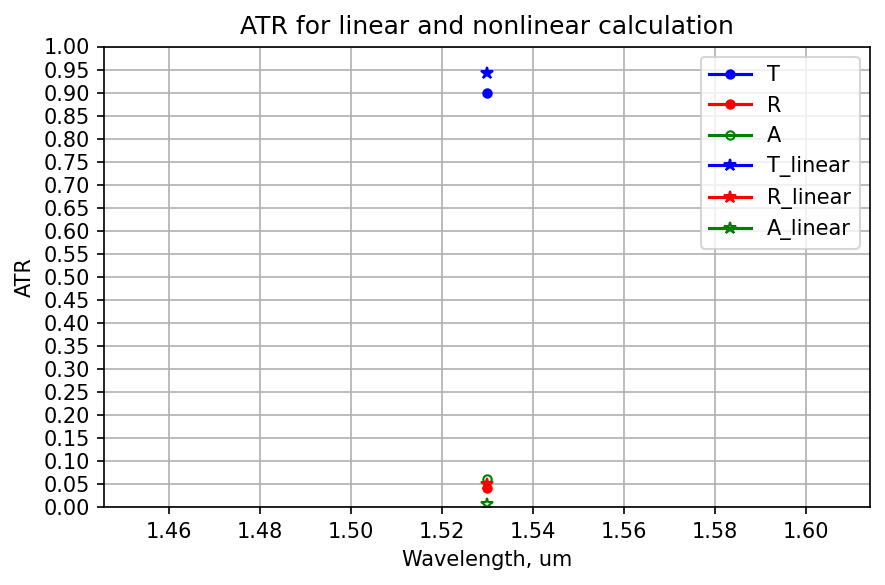

In [58]:
#         plot ATR
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux/flux_ref,'ob-',label='T',markersize=4)
plt.plot(plt_range_ref,(-flux_refl+flux_ref)/flux_ref,'ro-',label='R',markersize=4)
plt.plot(plt_range_ref,1-(-flux_refl+flux_ref)/flux_ref-flux/flux_ref,'go-',label='A',markersize=4, markerfacecolor='none')
plt.plot(plt_range_ref,flux_lin/flux_ref,'*b-',label='T_linear')
plt.plot(plt_range_ref,(-flux_refl_lin+flux_ref)/flux_ref,'r*-',label='R_linear')
plt.plot(plt_range_ref,1-(-flux_refl_lin+flux_ref)/flux_ref-flux_lin/flux_ref,'g*-',label='A_linear', markerfacecolor='none')
plt.grid(True,which="both",ls="-")
plt.yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95, 1])
plt.xlabel('Wavelength, um')
plt.ylabel('ATR')
plt.legend(loc='upper right')
#plt.xlim([0.85, 5])
plt.ylim([0, 1])
plt.title('ATR for linear and nonlinear calculation')
plt.tight_layout()
np.savetxt('ATR.txt', (plt_range_ref,flux/flux_ref,1-flux_refl/flux_ref,1-(1-flux_refl/flux_ref)-flux/flux_ref), delimiter=',')